<a href="https://colab.research.google.com/github/MuizSarwar/learnML/blob/main/KNN_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
#import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report
)


np.random.seed(42)

In [53]:
wine = load_wine()
X = wine.data
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [54]:
#KNN model uinsg pipeline
knn_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=15,metric='minkowski',p=2))
])

knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=15))])

In [55]:
#prediction , accuracy , confusion matrix , classification report
y_pred = knn_pipe.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Accuracy: 1.0
Confusion Matrix: 
[[15  0  0]
 [ 0 18  0]
 [ 0  0 12]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



#Let's try to find best K values  

In [56]:
#Find best K value
k_values = range(1,42)
accurecy_lst = []

for k in k_values:
  pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2))
  ])

  pipe.fit(X_train, y_train)
  y_pred = pipe.predict(X_test)
  accurecy_lst.append(accuracy_score(y_test, y_pred))

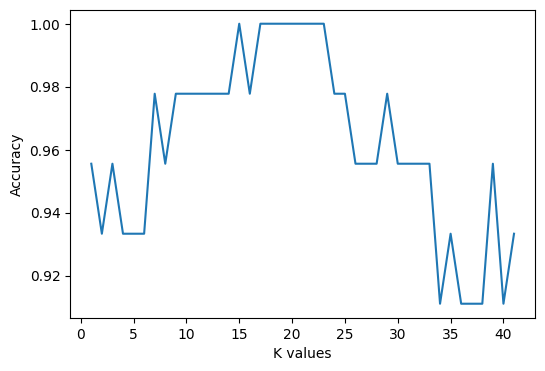

Best k value is  15


In [57]:
#Plot a graph to find best k values:
plt.figure(figsize=(6,4))
plt.plot(k_values, accurecy_lst)
plt.xlabel('K values')
plt.ylabel('Accuracy')
plt.show()

best_k = list(k_values)[np.argmax(accurecy_lst)]
print("Best k value is ",best_k)

#For the best K value , now find the best Metrics and best voting weights ( Euclidean uniform , Manhattan uniform  ,Euclidean distance )




In [58]:
#find best Metrics and voting weights

settings = [
    ('Euclidean uniform ',KNeighborsClassifier(n_neighbors=best_k,metric='minkowski',p=2,weights='uniform')),
    ('Manhattan uniform ',KNeighborsClassifier(n_neighbors=best_k,metric='minkowski',p=1,weights='uniform')),
    ('Euclidean distance ',KNeighborsClassifier(n_neighbors=best_k,metric='minkowski',p=2,weights='distance')),
]


result = []

for name,knn in settings:
  pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', knn)
  ])
  pipe.fit(X_train, y_train)
  y_pred = pipe.predict(X_test)
  result.append([name,accuracy_score(y_test, y_pred)])

df = pd.DataFrame(result,columns=['Metrics','Accuracy'])
df

,Metrics,Accuracy
0,Euclidean uniform,1.000000
1,Manhattan uniform,0.977778
2,Euclidean distance,1.000000
